In [8]:
#### IMPORTS

import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from tensorflow import keras
from zipfile import ZipFile
from urllib.request import urlopen
from urllib.error import HTTPError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.exceptions import DataConversionWarning

#### TURNING OFF WARNINGS

# Turning off DataConversion warning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Turning off keras warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# Turning off the chained assignment warning
pd.options.mode.chained_assignment = None

# Fixing random number generator's seed to get reproducible results

#tf.random.set_random_seed(20)
tf.random.set_seed(20)
np.random.seed(20)

In [9]:
def get_dataset():        
    
    """Checks existance of dataset and gets it if it exists at given URL

    Returns: 
        * Data frame if dataset exists online or else prints error

    """
    
    try:
        url="https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
        url = urlopen(url)
        
        # download Bike-Sharing-Dataset.zip from URL
        bike_share_zip_file=open('Bike-Sharing-Dataset.zip','wb')
        bike_share_zip_file.write(url.read())
        bike_share_zip_file.close()
        
        # Here, we store the hour.csv file in dataframe and return it
        with ZipFile("Bike-Sharing-Dataset.zip", "r") as f:
            if "hour.csv" in f.namelist():
                zip_file_object = ZipFile('Bike-Sharing-Dataset.zip') 
                # Here we make dteday as index column
                hour_csv_dataframe = pd.read_csv(zip_file_object.open('hour.csv'),parse_dates=['dteday'],index_col="dteday")
                return hour_csv_dataframe
            else:
                print("Sorry, could not find hour.csv file in zip file. Please recheck file name")
    except HTTPError:
        print("Sorry, could not connect or find the file at url", url)

In [10]:
# data variable below, contains hour.csv file as dataFrame
data = get_dataset()

In [11]:
print("We have", data.shape[0], "rows and", data.shape[1], "columns in our data")

We have 17379 rows and 16 columns in our data


In [12]:
data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

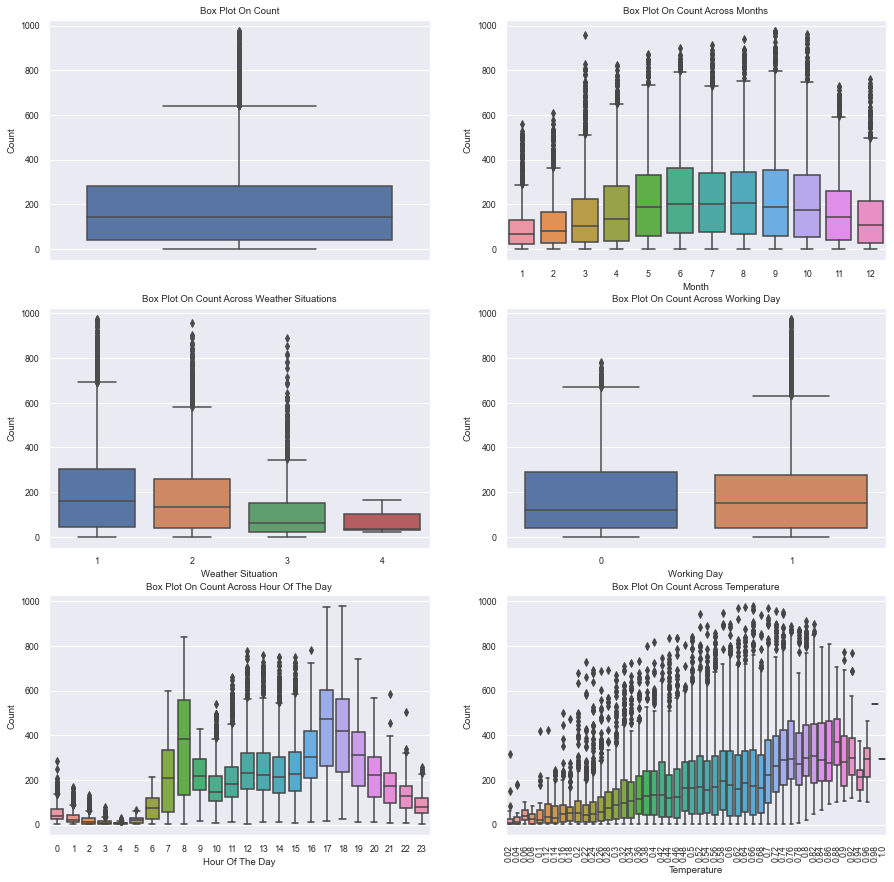

In [14]:
sns.set(font_scale=0.8)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2][0])
ax = sns.boxplot(data=data,y="cnt",x="temp",orient="v")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

In [15]:
data=data.drop(columns=['instant','atemp','weekday','casual','registered'])

In [16]:
data=data.dropna()

In [22]:
data.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,0,0,1,-1.405712,0.943593,-1.5639,16
2011-01-01,1,0,1,1,0,0,1,-1.508863,0.892310,-1.5639,40
2011-01-01,1,0,1,2,0,0,1,-1.508863,0.892310,-1.5639,32
2011-01-01,1,0,1,3,0,0,1,-1.405712,0.635892,-1.5639,13
2011-01-01,1,0,1,4,0,0,1,-1.405712,0.635892,-1.5639,1


In [18]:
training_set_size = int(len(data)*0.9)
test_set_size = len(data)-training_set_size
training_set,test_set = data.iloc[0:training_set_size],data.iloc[training_set_size:len(data)]
print("Length of training set is", len(training_set))    
print("Length of test set is",len(test_set))

Length of training set is 15641
Length of test set is 1738


In [19]:
columns_to_scale = ['temp','hum','windspeed']
temp_hum_wind_transformer = StandardScaler().fit(training_set[columns_to_scale].to_numpy())
cnt_transformer = StandardScaler().fit(training_set[['cnt']])

training_set.loc[:,columns_to_scale] = temp_hum_wind_transformer.transform(training_set[columns_to_scale].to_numpy())
training_set['cnt'] = cnt_transformer.transform(training_set[['cnt']])

test_set.loc[:,columns_to_scale] = temp_hum_wind_transformer.transform(test_set[columns_to_scale].to_numpy())
test_set['cnt'] = cnt_transformer.transform(test_set[['cnt']])

In [20]:
def create_data_sequence(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    input_sequence, output = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)        
        output.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output)

In [21]:
time_steps = 7

# Here training_set_sequence, test_set_sequence are input features for training and test set, as numpy arrays. 
# training_set_output and test_set_output are "cnt" values for training and test set sequences, as numpy arrays.
training_set_sequence, training_set_output = create_data_sequence(training_set, training_set.cnt, time_steps)
test_set_sequence, test_set_output = create_data_sequence(test_set, test_set.cnt, time_steps)

# We get training and test set sequences as [samples, time_steps, n_features]

print("Training data shape", training_set_sequence.shape, "Training data output shape", training_set_output.shape)
print("Test data shape", test_set_sequence.shape, "Test data output shape", test_set_output.shape)

Training data shape (15634, 7, 11) Training data output shape (15634,)
Test data shape (1731, 7, 11) Test data output shape (1731,)


In [25]:
data

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,0,0,1,-1.405712,0.943593,-1.563900,16
2011-01-01,1,0,1,1,0,0,1,-1.508863,0.892310,-1.563900,40
2011-01-01,1,0,1,2,0,0,1,-1.508863,0.892310,-1.563900,32
2011-01-01,1,0,1,3,0,0,1,-1.405712,0.635892,-1.563900,13
2011-01-01,1,0,1,4,0,0,1,-1.405712,0.635892,-1.563900,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,1,1,12,19,0,1,2,-1.302561,-0.133362,-0.219678,119
2012-12-31,1,1,12,20,0,1,2,-1.302561,-0.133362,-0.219678,89
2012-12-31,1,1,12,21,0,1,1,-1.302561,-0.133362,-0.219678,90


In [23]:
training_set_sequence[0]

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        , -1.40571176,  0.94359324, -1.56390034,
        -0.95218165],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        , -1.50886276,  0.89230968, -1.56390034,
        -0.81927438],
       [ 1.        ,  0.        ,  1.        ,  2.        ,  0.        ,
         0.        ,  1.        , -1.50886276,  0.89230968, -1.56390034,
        -0.8635768 ],
       [ 1.        ,  0.        ,  1.        ,  3.        ,  0.        ,
         0.        ,  1.        , -1.40571176,  0.63589188, -1.56390034,
        -0.96879506],
       [ 1.        ,  0.        ,  1.        ,  4.        ,  0.        ,
         0.        ,  1.        , -1.40571176,  0.63589188, -1.56390034,
        -1.03524869],
       [ 1.        ,  0.        ,  1.        ,  5.        ,  0.        ,
         0.        ,  2.        , -1.40571176,  0.63589188, -0.83039034,
        -1.035

## simple rnn

In [130]:
def machine_learning_model_1():
    """Defines machine learning model
    
    Returns:
        * model: SimpleRNN model
    
    """
    model = keras.Sequential()
    model.add(keras.layers.SimpleRNN(units=128,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    return model

In [131]:
training_set_sequence.shape

(15634, 7, 11)

In [133]:
model = machine_learning_model_1()

history = model.fit(
    training_set_sequence,
    training_set_output, 
    epochs=50, 
    batch_size=64, 
    validation_split=0.1,
    shuffle=False,
)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 128)               17920     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
220/220 [==============================] - 2s 8ms/step - loss: 0.5174 - val_loss: 0.3651
Epoch 2/50
220/220 [==============================] - 2s 9ms/step - loss: 0.2584 - val_loss: 0.3161
Epoch 3/50
220/220 [==============================] - 2s 8ms/step - loss: 0.1751 - val_loss: 0.2408
Epoch 4/50
22

In [134]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 128)               17920     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


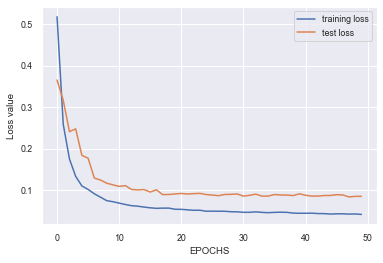

In [135]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [136]:
test_set_predictions = model.predict(test_set_sequence)

In [137]:
model_predictions = cnt_transformer.inverse_transform(test_set_predictions)

actual_testset_values = cnt_transformer.inverse_transform(test_set_output.reshape(-1,1))

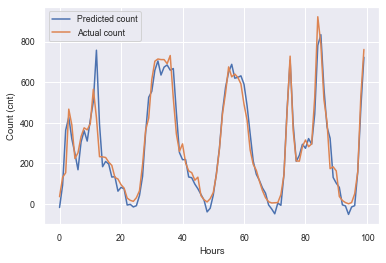

In [138]:
fig,ax = plt.subplots()
plt.plot(model_predictions[:100,], label='Predicted count')
plt.plot(actual_testset_values[:100,], label='Actual count')
ax.set_xlabel('Hours')
ax.set_ylabel('Count (cnt)')
plt.legend();
plt.show()

## LSTM

In [139]:
def machine_learning_model_2():
    """Defines machine learning model
    
    Returns:
        * model: LSTM model
    
    """
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=128,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    return model

In [140]:
model = machine_learning_model_2()

history = model.fit(
    training_set_sequence,
    training_set_output, 
    epochs=50, 
    batch_size=64, 
    validation_split=0.1,
    shuffle=False,
)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               71680     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 71,809
Trainable params: 71,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
220/220 [==============================] - 2s 6ms/step - loss: 0.2596 - val_loss: 0.4345
Epoch 2/50
220/220 [==============================] - 1s 4ms/step - loss: 0.1552 - val_loss: 0.2104
Epoch 3/50
220/220 [==============================] - 1s 4ms/step - loss: 0.1143 - val_loss: 0.1648
Epoch 4/50
22

In [141]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               71680     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 71,809
Trainable params: 71,809
Non-trainable params: 0
_________________________________________________________________


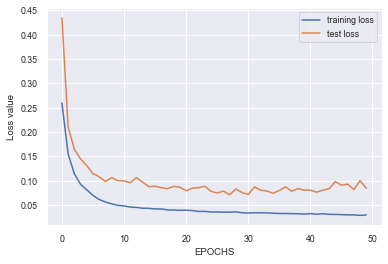

In [142]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [143]:
test_set_predictions = model.predict(test_set_sequence)

In [144]:
model_predictions = cnt_transformer.inverse_transform(test_set_predictions)
actual_testset_values = cnt_transformer.inverse_transform(test_set_output.reshape(-1,1))

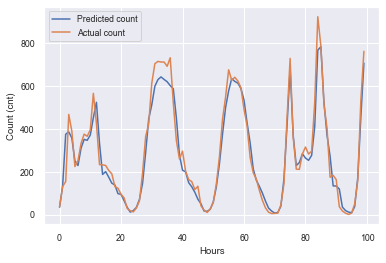

In [145]:
fig,ax = plt.subplots()
plt.plot(model_predictions[:100,], label='Predicted count')
plt.plot(actual_testset_values[:100,], label='Actual count')
ax.set_xlabel('Hours')
ax.set_ylabel('Count (cnt)')
plt.legend();
plt.show()

## GRU

In [146]:
def machine_learning_model_3():
    """Defines machine learning model
    
    Returns:
        * model: LSTM model
    
    """
    model = keras.Sequential()
    model.add(keras.layers.GRU(units=128,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    return model

In [147]:
model = machine_learning_model_3()

history = model.fit(
    training_set_sequence,
    training_set_output, 
    epochs=50, 
    batch_size=64, 
    validation_split=0.1,
    shuffle=False,
)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 128)               54144     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
220/220 [==============================] - 2s 4ms/step - loss: 0.3538 - val_loss: 0.5368
Epoch 2/50
220/220 [==============================] - 1s 4ms/step - loss: 0.1928 - val_loss: 0.4040
Epoch 3/50
220/220 [==============================] - 1s 4ms/step - loss: 0.1703 - val_loss: 0.2572
Epoch 4/50
22

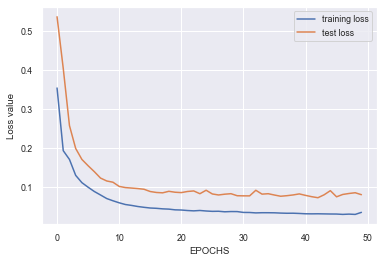

In [148]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [149]:
test_set_predictions = model.predict(test_set_sequence)

In [150]:
model_predictions = cnt_transformer.inverse_transform(test_set_predictions)
actual_testset_values = cnt_transformer.inverse_transform(test_set_output.reshape(-1,1))

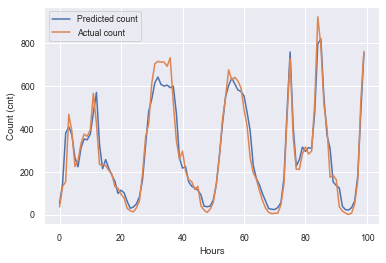

In [151]:
fig,ax = plt.subplots()
plt.plot(model_predictions[:100,], label='Predicted count')
plt.plot(actual_testset_values[:100,], label='Actual count')
ax.set_xlabel('Hours')
ax.set_ylabel('Count (cnt)')
plt.legend();
plt.show()

In [23]:
def get_mean_absolute_deviations(predictions,actual_values):
    """ Compute the mean absolute deviations of predictions vs actual test set values
        Arguments:
        * predictions: Our Model's predictions
        * actual_values: Test set output
    
    """
    
    # Convert numpy arrays to data frame as pandas as mean absolute deviation function we want to use
    predictions_dataframe = pd.DataFrame(data = predictions.flatten())
    actual_test_set_values_dataframe = pd.DataFrame(data=actual_values.flatten())
        
    print("LSTM model prediction's Mean Absolute Deviation is ", predictions_dataframe.mad()[0])
    print("Test set's Mean Absolute Deviation is", actual_test_set_values_dataframe.mad()[0])


In [24]:
get_mean_absolute_deviations(model_predictions,actual_testset_values)

LSTM model prediction's Mean Absolute Deviation is  145.09213
Test set's Mean Absolute Deviation is 149.7246566752137


In [25]:
def get_prediction(input_sequence):
    """ Gets prediction of bike share count based on input sequence
    
    Arguments:
    * input_sequence: <time_steps> hours of sequence data
    
    Returns:
    * cnt_prediction: Predicted count value of bike share
    """
    
    prediction = model.predict(input_sequence)
    cnt_prediction = cnt_transformer.inverse_transform(prediction)
    return cnt_prediction

In [26]:
arbitrary_data = np.array(
     [[[ 4.        ,  1.        , 10.        , 22.        ,  0.        ,
         1.        ,  2.        ,  0.14155316,  1.04616036,  0.02427978,
         0.22737033],
       [ 4.        ,  1.        , 10.        , 23.        ,  0.        ,
         1.        ,  2.        ,  0.14155316,  1.04616036, -1.56390034,
        -0.39286357],
       [ 4.        ,  1.        , 10.        ,  0.        ,  0.        ,
         1.        ,  2.        ,  0.24470415,  1.04616036, -0.70841156,
        -0.73066954],
       [ 4.        ,  1.        , 10.        ,  1.        ,  0.        ,
         1.        ,  3.        ,  0.14155316,  1.30257816, -1.56390034,
        -0.95218165],
       [ 4.        ,  1.        , 10.        ,  2.        ,  0.        ,
         1.        ,  2.        ,  0.14155316,  1.30257816, -1.56390034,
        -0.98540846],
       [ 4.        ,  1.        , 10.        ,  3.        ,  0.        ,
         1.        ,  2.        ,  0.24470415,  1.04616036, -1.56390034,
        -1.01309748],
       [ 4.        ,  1.        , 10.        ,  4.        ,  0.        ,
         1.        ,  2.        ,  0.24470415,  1.04616036, -1.56390034,
        -1.00755968]]])
print("Predicted Bike Share Count for next hour based on last", time_steps,"hours of data is", int(get_prediction(arbitrary_data)))

Predicted Bike Share Count for next hour based on last 7 hours of data is 44
